In [2]:
from rootpy.tree import Tree, Ntuple, TreeModel, TreeChain
from rootpy.tree.treetypes import *
from rootpy.tree.tree import *
from rootpy.tree.model import *
#import ROOT
#import rootpy.stl as stl

#stl.vector(stl.string)

In [3]:
# define the model
import math

class ReconstructedPosition(TreeModel):

    # x position (cm)
   x = FloatCol(default='nan')

   #: y position (cm)
   y = FloatCol(default='nan')

   #: goodness-of-fit parameter generated with PosRecChiSquareGamma
   goodness_of_fit = FloatCol(default='nan')

   # : number of degrees of freedom calculated with PosRecChiSquareGamma
   ndf = FloatCol('nan')

   #: Name of algorithm used for computation
   #algorithm  = stl.vector('string') # doesnt compile, TODO solve.
   algorithm = CharArrayCol(10)


class Hit(TreeModel):

   """
   A hit results from, within individual channel, fluctation above baseline.
   These are be clustered into ordinary peaks later. This is commonly
   called a 'hit' in particle physics detectors.  Very generally, a hit is
   made every time that the data recorded for one channel flucates above
   baseline.
   """

    #: Channel in which this peak was found
   channel = IntCol()

    #: Index in the event at which this peak has its maximum.
   index_of_maximum = IntCol()

    #: Time (since start of event in ns) of hit's center of gravity
   center = DoubleCol()

    #: Index of left bound (inclusive) of peak.
   left = IntCol()                

    #: Index of right bound (INCLUSIVE!!) of peak
   right = IntCol()                

   @property
   def length(self):
      return self.right - self.left + 1
    
   #: Area of the peak in photoelectrons
   area = DoubleCol()                  

    #: Height of highest point in peak (in pe/bin)
   height = DoubleCol()

    #: Noise sigma in pe/bin of pulse in which peak was found.
    #: Note: in Pulse the same number is stored in ADC-counts
   noise_sigma = DoubleCol()

    #: Index of pulse (in event.pulses) in which peak was found
   found_in_pulse = IntCol()

    #: Set to True if rejected by suspicious channel algorithm
   is_rejected = BoolCol()

    #: Number of samples with ADC saturation in this hit
   n_saturated = IntCol()


    
class Peak(Hit.prefix("hits_")):
   # A peak will be, e.g., S1 or S2. 
   
   
   # Type of peak (e.g., 's1', 's2', ...)
   type_ = CharArrayCol(10)
   
    # e.g. tpc or veto
   detector = CharArrayCol(10)
   
   # Area of the pulse in photoelectrons. Includes only contributing pmts in the right detector. For XDP matching rightmost sample is not included in area integral.
   area = FloatCol(10) 

   # Peaks in individual channels that make up this peak
   #hits = hits = ListField(Hit) # TODO stl.vector(Hit)
   
   #: Array of areas in each PMT.
   area_per_channel = DoubleArrayCol(10)
   
    #: Does a channel have no hits, but digitizer shows data? 
   does_channel_have_noise = BoolArrayCol(10) 

    #: Does a PMT see 'something significant'? (thresholds configurable)
   does_channel_contribute = BoolArrayCol(10) 

    #: Number of samples with ADC saturation in this peak, per channel
   n_saturated_per_channel = ShortArrayCol(10)

    #: Total number of samples with ADC saturation threshold in all channels in this peak
   n_saturated = IntCol()

    ##
    # Time distribution information
    ##

   left = IntCol()                #: Index of left bound (inclusive) in event.
   
   right = IntCol()                #: Index of right bound (INCLUSIVE) in event.

    #: Weighted (by hit area) mean of hit times (since event start)
   hit_time_mean = FloatCol()

    #: Weighted (by hit area) std of hit times
   hit_time_std = FloatCol()

    #: Central ange of peak (hit-only) sum waveform which includes fraction of area.
    #: e.g. range_50p_area = distance (in time) between point of 25% area and 75% area (interpolated between samples)
   range_20p_area = FloatCol()
   
   range_50p_area = FloatCol()
   
   range_90p_area = FloatCol()

    ##
    # Spatial pattern information
    ##

    #: List of reconstructed positions (instances of :class:`pax.datastructure.ReconstructedPosition`)
   # reconstructed_positions = ListField(ReconstructedPosition) # <-- TODO stl.vector(ReconstructedPosition)


    #: Weighted root mean square deviation of top hitpattern (cm)
   top_hitpattern_spread = FloatCol()

   #: Weighted root mean square deviation of bottom hitpattern (cm)
   bottom_hitpattern_spread = FloatCol()

    #: Fraction of area in the top array
   area_fraction_top = FloatCol()

    ##
    # Signal / noise info
    ##

    #: Number of PMTS which see something significant (depends on settings) ~~ "coincidence level"
   n_contributing_channels = IntCol()

    #: Number of channels that show no hits, but digitizer shows data
   n_noise_channels = IntCol()

    #: Weighted (by area) mean hit amplitude / noise level in that hit's channel
   mean_amplitude_to_noise = FloatCol()

    ##
    # Sum-waveform properties
    ##

    #: The peak's sum waveform in pe/bin
    #: The peak's center of gravity is always in the center of the array.
   sum_waveform = FloatArrayCol(10)

    #: For tpc peaks, the peak's sum waveform in the top array only. Aligned with the sum waveform.
   sum_waveform_top = FloatArrayCol(10)

    #: Index in the event's sum waveform at which this peak has its maximum.
   index_of_maximum = IntCol()

    #: Time at which the peak's sum waveform has its center of gravity.
   center_time = DoubleCol()

    #: Height of sum waveform (in pe/bin)
   height = FloatCol()


class SumWaveform(TreeModel):

   """ Class used to store sum (filtered or not) waveform information. """

   #: Name of the filter used (or 'none')
   name_of_filter = CharArrayCol(100)
    
    #: Name of this sum waveform
   name = CharArrayCol(100)
    
    #: Name of the detector this waveform belongs to (e.g. tpc or veto)
   detector = CharArrayCol(100)

   #: Array of PMT numbers included in this waveform
   channel_list = ShortArrayCol(100)

   #: Array of samples, units of pe/bin.
   samples = FloatArrayCol(100)


class Pulse(TreeModel):

   """A DAQ pulse
   A DAQ pulse can also be thought of as a pulse in a PMT.  Remember that this is
   inverted.
   """

    #: Start time of this pulse: samples
    #:
    #: Units are samples. This nonnegative number starts at zero and is an integer because
    #: it's an index.
   left = IntCol()

    #: Stoptime of this pulse within event
    #:
    #: Units are samples and this time is inclusive of last sample.  This nonnegative number
    #: starts at zero and is an integer because it's an index.
   right = IntCol()

    #: Channel number the pulse belongs to
   channel = IntCol()

    #: Raw wave data (numpy array of int16, ADC counts)
   raw_data = ShortArrayCol(10)

    #: Baseline in ADC counts relative to reference baseline -- but float!
   baseline = FloatCol()

    #: Maximum amplitude reached in the pulse (in ADC counts above baseline)
   maximum = FloatCol()

    #: Minimum amplitude (in ADC counts above baseline, so should be negative)
   minimum = FloatCol()

   #: Noise sigma for this pulse (in ADC counts - but float!)
   noise_sigma = FloatCol()



class Interaction(Peak.prefix("s1_"),Peak.prefix("s2_")):
   """ test 1 2 3 """

   # The S1 peak of the interaction
   # s1 = ObjectCol(Peak) # <-- #TODO 

   # The S2 peak of the interaction
   # s2 = ObjectCol(Peak) # <-- #TODO

   # The reconstructed position of the interaction
   x = FloatCol()
   
   y = FloatCol()

   # goodness-of-fit parameter of s2 hitpattern to x,y position reconstructed by PosRecChiSquareGamma
   xy_posrec_goodness_of_fit = FloatCol()

     
    # number of degrees of freedom calculated with PosRecChiSquareGamma
   xy_posrec_ndf = FloatCol()
   
    # Algorithm used for xy position reconstructed
   xy_posrec_algorithm = CharArrayCol(10)

   # drift time (ns) between S1 and S2
   drift_time = FloatCol()
   # z position (cm), calculated from drift time
   z = FloatCol()

   # Multiplicative correction to s1 area based on position (due to LCE variations)
   s1_area_correction = FloatCol()
   # Multiplicative correction to s2 area based on position (due to electron lifetime and LCE variations)
   s2_area_correction = FloatCol()

   # Likelihood of s2 width based on z position
   s2_width_likelihood = FloatCol()

   # Linkelihood of s1 asymmetry based on z position
   s1_asymmetry_likelihood = FloatCol()

   # Likelihood of s1 hitpattern spread based on z position
   s1_hitpattern_spread_likelihood = FloatCol() 



class Event(Interaction.prefix("interaction_")):
   # A simple tree object, later on we want the Event/Peak/Hit stuff to be also defined like this
   # The name of the dataset this event belongs to
   dataset_name = CharArrayCol(10)
   # A nonnegative integer that uniquely identifies the event within the dataset 
   event_number = IntCol()

   # Number of channels in the event. Has to be the same as n_channels in config, provided here for deserialization ease
   n_channels = IntCol()
   
   start_time = ULongCol() # 64 bit integer

   # This stop time includes the last recorded sample.  Therefore, it's the right edge of the last sample.  This is a 64-bit integer for the reasons explained in 'start_time'.
   stop_time = ULongCol()

   # Time duration of a sample (in pax units, i.e. ns). For V1724 digitizers (e.g. XENON), this is 10 nanoseconds always.
   sample_duration = ULongCol()

   # A list of :class:`pax.datastructure.Interaction` objects.
   #interactions = ObjectCol(Interaction) # TODO should be array
   
   # peaks  <-- same problem
   # all_hits <-- same problem
   # sum_waveforms <-- same problem
   # pulses <-- same problem
   
   # Number of noise pulses (pulses without any hits found) per channel
   noise_pulses_in = IntArrayCol(10)

   # Was channel flagged as suspicious?
   is_channel_suspicious = BoolArrayCol(10)

   # Number of hits rejected in the suspicious channel algorithm
   n_hits_rejected = IntArrayCol(10) 

In [4]:
from rootpy.io import root_open, TemporaryFile
f = root_open("test_pax_rootpy.root", "recreate")
tree_event = Tree("treeEvent", model=Event)
tree_event.start_time = 234
tree_event.event_number = 1
tree_event.dataset_name = b'dataset1'
tree_event.noise_pulses_in = [1,2,5,6]
tree_event.is_channel_suspicious = [True,False,True,False]
tree_event.n_hits_rejected = [6,3,6,1]

tree_event.interaction_x = 34.2 # we can access Interaction from here


tree_event.fill()
#foo.write()
#tree_event.fill()

# another one??
tree_event.start_time = 123
tree_event.event_number = 2
tree_event.dataset_name = b'dataset2'
tree_event.noise_pulses_in = [2,3,6,7]
tree_event.is_channel_suspicious = [True,True,True,False]
tree_event.n_hits_rejected = [9,7,6,1]
tree_event.fill()


tree_event.write()
type(tree_event)

for branch in tree_event.GetListOfBranches():
    print(branch)


<ROOT.TBranch object ("interaction_s1_hits_channel") at 0x44f0a70>
<ROOT.TBranch object ("interaction_s2_hits_channel") at 0x44f0f00>
<ROOT.TBranch object ("interaction_s1_hits_index_of_maximum") at 0x19b3330>
<ROOT.TBranch object ("interaction_s2_hits_index_of_maximum") at 0x44fdf90>
<ROOT.TBranch object ("interaction_s1_hits_center") at 0x44fc060>
<ROOT.TBranch object ("interaction_s2_hits_center") at 0x44cdee0>
<ROOT.TBranch object ("interaction_s1_hits_left") at 0x44c9b00>
<ROOT.TBranch object ("interaction_s2_hits_left") at 0x44c68b0>
<ROOT.TBranch object ("interaction_s1_hits_right") at 0x44ca0b0>
<ROOT.TBranch object ("interaction_s2_hits_right") at 0x44ca690>
<ROOT.TBranch object ("interaction_s1_hits_area") at 0x19b6180>
<ROOT.TBranch object ("interaction_s2_hits_area") at 0x19b6700>
<ROOT.TBranch object ("interaction_s1_hits_height") at 0x19b6c80>
<ROOT.TBranch object ("interaction_s2_hits_height") at 0x19b7260>
<ROOT.TBranch object ("interaction_s1_hits_noise_sigma") at 0x44

In [5]:
tree_peak = Tree("treePeak", model=Peak)
for branch in tree_peak.GetListOfBranches():
    print(branch)

tree_peak.detector = b'detector1'
tree_peak.area = 3.534
tree_peak.left = 5
tree_peak.right = 88
tree_peak.fill()
tree_peak.write()

<ROOT.TBranch object ("hits_channel") at 0x4d34220>
<ROOT.TBranch object ("hits_index_of_maximum") at 0x4d369b0>
<ROOT.TBranch object ("hits_center") at 0x4cf92c0>
<ROOT.TBranch object ("hits_left") at 0x2bde120>
<ROOT.TBranch object ("hits_right") at 0x2bddcb0>
<ROOT.TBranch object ("hits_area") at 0x4cfa260>
<ROOT.TBranch object ("hits_height") at 0x4cfa6d0>
<ROOT.TBranch object ("hits_noise_sigma") at 0x4cfab40>
<ROOT.TBranch object ("hits_found_in_pulse") at 0x4d54c50>
<ROOT.TBranch object ("hits_is_rejected") at 0x4d550f0>
<ROOT.TBranch object ("hits_n_saturated") at 0x4d555c0>
<ROOT.TBranch object ("type_") at 0x4d55b50>
<ROOT.TBranch object ("detector") at 0x4d564f0>
<ROOT.TBranch object ("area") at 0x4d032a0>
<ROOT.TBranch object ("area_per_channel") at 0x4d03710>
<ROOT.TBranch object ("does_channel_have_noise") at 0x4d03be0>
<ROOT.TBranch object ("does_channel_contribute") at 0x4d041d0>
<ROOT.TBranch object ("n_saturated_per_channel") at 0x4d04840>
<ROOT.TBranch object ("n_sat

In [6]:
tree_reconstructed_position = Tree("treeReconstructedPosition", model=ReconstructedPosition)
for branch in tree_reconstructed_position.GetListOfBranches():
    print(branch)

tree_reconstructed_position.x = 5
tree_reconstructed_position.y = 4
tree_reconstructed_position.ndf = 10
tree_reconstructed_position.algorithm = b'thisone'
tree_reconstructed_position.fill()
tree_reconstructed_position.write()

<ROOT.TBranch object ("x") at 0x4d4e8b0>
<ROOT.TBranch object ("y") at 0x4d4ec50>
<ROOT.TBranch object ("goodness_of_fit") at 0x4d4f0c0>
<ROOT.TBranch object ("ndf") at 0x4d4f530>
<ROOT.TBranch object ("algorithm") at 0x4cfcea0>


In [7]:
f.write()


f.close()

False

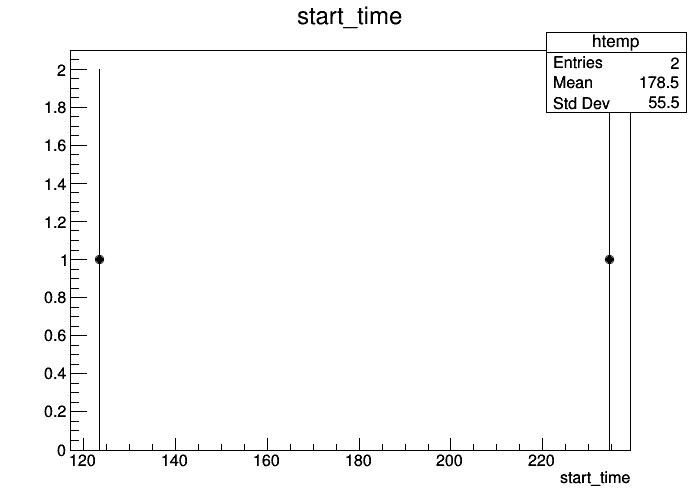

In [14]:
from rootpy.io import root_open
fileReadRootpy = root_open("test_pax_rootpy.root", "read")
treeEvent = fileReadRootpy.Get('treeEvent')
# define objects by prefix:
#treeEvent.define_object(name='interaction', prefix='interaction_')

treeEvent.Scan('event_number:dataset_name:start_time:interaction_x') # result printed in console??
len(treeEvent)
treeEvent.Draw('start_time') # plotting nonsense, just test



In [15]:
type(treeEvent)

rootpy.tree.tree.Tree

In [16]:
treePeak = fileReadRootpy.Get('treePeak')
treePeak.Scan('left:right:area')

1